# Lab2 Gradient Descent Principles

### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib
import math
%matplotlib inline

### Helper functions

In [2]:
def grad_descent(x0, ak, max_iter, fct, grad_fct, threshold):
    iter_ = 0
    xk = x0
    x_iter = list()
    x_iter.append(xk)
    while iter_ <= max_iter:
        xk1 = xk - ak * grad_fct(xk[0],xk[1])
        x_iter.append(xk1)
        fct_next = fct(xk1[0],xk1[1])
        fct_current = fct(xk[0],xk[1])
        if abs(fct_next - fct_current) < threshold and fct_next < fct_current:
            print("The algorithm has converged after", iter_ + 1, "iterations!!!")
            break
        xk = xk1
        if iter_ == max_iter:
            print("The algorithm has NOT converged after", max_iter, "iterations!!!")
        iter_ += 1
    return(np.asarray(x_iter))

In [3]:
def plot_grad_descent(x,y,z,grad_steps):
    plt.figure(figsize = (10,7))
    plt.contour(x,y,z, 50)
    plt.plot(grad_steps[:,0], grad_steps[:,1], linestyle = '-')
    plt.scatter(grad_steps[:,0], grad_steps[:,1])
    plt.show()

def compute_grad_update(xk,ak,fct,grad_fct, compute_current = True):
    next_step = xk - ak * grad_fct(xk[0],xk[1])    
    fct_next = fct(next_step[0], next_step[1])
    if compute_current:
        fct_current = fct(xk[0], xk[1])
        return(next_step, fct_next, fct_current)
    return(next_step, fct_next)

def grad_backtracking(x0, max_iter, fct, grad_fct, tol_fct, tol_a, hessian = None):
    iter_ = 0
    xk = x0
    
    ## For plotting Newton vs Gradient descent method
    if not hessian is None:
        newton = []
        newton.append(check_pos_def(hessian(xk[0],xk[1])))
        
    x_iter = list()
    x_iter.append(xk)
    
    while iter_ < max_iter:        
        ## set a^k = 1 at each iteration
        ak = 1
        
        ## compute x^{k+1}, f(x^{k+1}), f(x^k)
        next_step, fct_next, fct_current = compute_grad_update(xk,ak,fct,grad_fct) 
        
        ## Check if function value becomes smaller in next step
        if fct_next < fct_current:
            ## If so, update x^{k+1}
            x_iter.append(next_step)
            xk = next_step
            
            ## For plotting Newton vs Gradient descent method
            if not hessian is None:
                newton.append(check_pos_def(hessian(xk[0],xk[1])))
                
        else:
            ## If function does not become smaller
            ## Check if minimum has been reached
            diff = abs(fct_next - fct_current)
            if diff < tol_fct:
                ## If so, break out of while loop and terminate
                print("The algorithm has converged at", xk , "after", iter_ + 1, "iterations!")
                break    
            else:
                ## If minimum has not been reached
                ## Run inner loop, as long as function value is not getting smaller
                while fct_next >= fct_current:
                    ## Half step size
                    ak = ak/2
                    next_step, fct_next = compute_grad_update(xk,ak,fct,grad_fct,False)
                    ## Check if tolerances are reached
                    diff = abs(fct_next - fct_current)
                    if diff < tol_fct or ak < tol_a:
                        ## If so, break out of inner loop
                        break
                if diff < tol_fct or ak < tol_a:
                    ## If tolerances are reached also break out of outer loop
                    print("The algorithm has converged at", xk , "after", iter_ + 1, "iterations!")
                    break
                #update x^{k+1}
                x_iter.append(next_step)
                xk = next_step

                ## For plotting Newton vs Gradient descent method
                if not hessian is None:
                    newton.append(check_pos_def(hessian(xk[0],xk[1])))
        iter_ += 1
        if iter_ == max_iter:
            print("Algorithm has NOT converged after", max_iter,"iterations!!")
    
    if not hessian is None:   
        return(np.asarray(x_iter), newton)
    else:
        return(np.asarray(x_iter))

In [4]:
negate = lambda x: bool(1-x)

def f_ex11(x1,x2):
    return(x1**2 + x2**2)

def grad_f_ex11(x1,x2):
    f1 = 2*x1
    f2 = 2*x2
    return(np.r_[f1, f2])

def f_ex12(x1, x2):
    f = x1**2*(4 - 2.1*x1**2 + 1/3*x1**4) + x1*x2 + x2**2*(-4+4*x2**2)
    return(f)

def grad_f_ex12(x1, x2):
    f1 = 8*x1 - 8.4*x1**3 + 2*x1**5 + x2 
    f2 = x1 - 8*x2 + 16*x2**3 
    return(np.r_[f1, f2])

def f_ex13(x1,x2):
    f = (a - x1)**2 + b*(x2 - x1**2)**2
    return(f)

def grad_f_ex13(x1, x2):
    f1 = -2*(a-x1) + 2*b*(x2 - x1**2)*(-2*x1)
    f2 = 2*b*(x2 - x1**2)
    return(np.r_[f1, f2])

def f_ex21(x1,x2):
    return(100*x1**2 + x2**2)

def grad_f_ex21(x1,x2):
    f1 = 200*x1
    f2 = 2*x2
    return(np.r_[f1,f2])

def hess_f_ex21():
    f11 = 200
    f12, f21 = 0, 0
    f22 = 2
    return(np.c_[np.r_[f11,f21],np.r_[f12,f22]])

def desc_dir_ex21(x1,x2):
    d = np.linalg.solve(hess_f_ex21(), grad_f_ex21(x1,x2))
    return(d)

def f_ex22(x1, x2):
    f = x1**2*(4 - 2.1*x1**2 + 1/3*x1**4) + x1*x2 + x2**2*(-4+4*x2**2)
    return(f)

def grad_f_ex22(x1, x2):
    f1 = 8*x1 - 8.4*x1**3 + 2*x1**5 + x2 
    f2 = x1 - 8*x2 + 16*x2**3 
    return(np.r_[f1, f2])

def hess_f_ex22(x1, x2):
    f1 = np.c_[8 - 25.2*x1**2 + 10*x1**4, 1]
    f2 = np.c_[1, -8 + 48*x2**2]
    return(np.r_[f1,f2])

def check_pos_def(hess):
    pos_def = True
    evals = np.linalg.eigvals(hess)
    for eval in evals:
        if eval <= 0:
            pos_def = False
    return(pos_def)

def desc_dir_ex22(x1,x2):
    if check_pos_def(hess_f_ex22(x1,x2)):
        d = np.linalg.solve(hess_f_ex22(x1,x2), grad_f_ex22(x1,x2))
    else:
        d = grad_f_ex22(x1,x2)
    return(d)

def f_ex23(x1,x2):
    f = (a - x1)**2 + b*(x2 - x1**2)**2
    return(f)

def grad_f_ex23(x1, x2):
    f1 = -2*(a-x1) + 2*b*(x2 - x1**2)*(-2*x1)
    f2 = 2*b*(x2 - x1**2)
    return(np.r_[f1, f2])

def hess_f_ex23(x1,x2):
    f11 = 2-4*b*x2+12*b*x1**2
    f21, f12 = -4*b*x1, -4*b*x1
    f22 = 2*b
    return(np.r_[np.c_[f11, f12], np.c_[f21, f22]])

def desc_dir_ex23(x1,x2):
    if check_pos_def(hess_f_ex23(x1,x2)):
        d = np.linalg.solve(hess_f_ex23(x1,x2), grad_f_ex23(x1,x2))
    else:
        d = grad_f_ex23(x1,x2)
    return(d)

## 1.1 A simple quadratic function

### Gradient descent with constant step size $\alpha^k = 0.1$

In this part of the assignment we will find the minimum of the quadratic function

$$
f(x) = x_1^2 + x_2^2
$$
 
by implementing the simplest form of the gradient descent algorithm

$$
x^{k+1} = x^k - \alpha^k \nabla f(x^k)
$$

where $x \in \mathbb{R}^2$ and $\alpha^k = 0.1$. The superscripts $k$ and $k+1$ are iteration indices.

In [5]:
x0 = np.random.uniform(-10, 10, (2,))
ak = 0.1
max_iter = 100
threshold = 1e-3

grad_steps = grad_descent(x0, ak, max_iter, f_ex11, grad_f_ex11, threshold)

The algorithm has converged after 24 iterations!!!


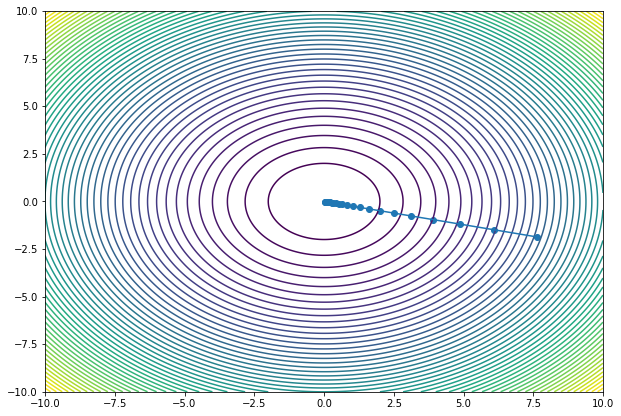

In [6]:
X = np.arange(-10, 10, 0.01)
Y = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(X, Y)

plot_grad_descent(X, Y, f_ex11(X,Y), grad_steps)

In the previous figure we are plotting the contours of the function $f(x)$ as circles and the iteration steps of the gradient descent algorithm as blue scatter points. We observe that the gradient descent algorithm generates points moving perpendicular to the contours, towards the minimum of the function at $(0,0)$. As $x^{k}$ approaches the minimum we also observe the steps between consecutive iterations becoming smaller, which is caused by a smaller gradient.

### Gradient descent with step size $\alpha^k = 1$

In [7]:
x0 = np.random.uniform(-100, 100, (2,))
ak = 1
max_iter = 100
threshold = 1e-3

grad_steps = grad_descent(x0, ak, max_iter, f_ex11, grad_f_ex11, threshold)

The algorithm has NOT converged after 100 iterations!!!


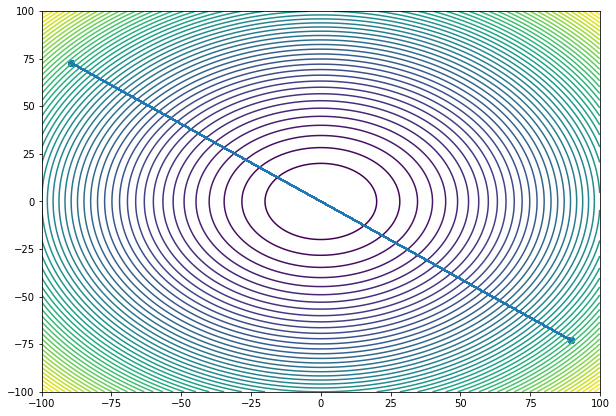

In [8]:
X = np.arange(-100, 100, 0.1)
Y = np.arange(-100, 100, 0.1)
X, Y = np.meshgrid(X, Y)

plot_grad_descent(X, Y, f_ex11(X,Y), grad_steps)

In this scenario, for $\alpha^k = 1$, the step size is too large so that the algorithm does not converge to the minimum. Instead, it overshoots and jumps back and forth between two points. This behavior becomes evident when considering that the function is symmetric around $(0,0)$. A symmetric function has identical gradient size for both points. Since the step size is constant and the gradient is identical just with reversed sign, the algorithm jumps between two points.

## The exercise of lab 1

We will analyse the function

$$
f(x_1, x_2) = x_1^2 (4 - 2.1x_1^2 + \frac{1}{3}x_1^4) + x_1 x_2 + x_2^2(-4 + 4x_2^2)
$$

from the first lab.

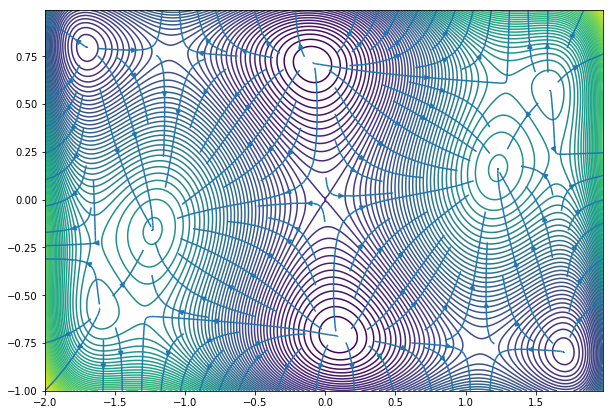

In [9]:
X = np.arange(-2, 2, 0.02)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)

plt.figure(figsize = (10,7))
plt.contour(X,Y,f_ex12(X,Y), 100)
plt.streamplot(X, Y, grad_f_ex12(X,Y)[:X.shape[0],:], grad_f_ex12(X,Y)[Y.shape[0]:,:])
plt.show()

We are displaying the contour plot of the function of lab1. In the plot we can see 8 optima. From the first lab we know that 
- 4 of them are local minima ((-1.705, 0.795), (-1.605, -0.57), (1.605, 0.57), (1.705, -0.795)), 
- 2 are local maxima ((-1.23, -0.16), (1.23, 0.16)), and 
- 2 are global minima ((0.09, -0.715), (-0.09, 0.715)).

### Gradient descent with constant step size $\alpha^k = 0.1$

In [10]:
X = np.arange(-2, 2, 0.02)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y, indexing = 'xy')

ak = 0.1
max_iter = 1000
threshold = 1e-3

repetitions = 10

In [11]:
x0 = np.r_[np.random.uniform(-2, 2) ,np.random.uniform(-1, 1)]

grad_steps = grad_descent(x0, ak, max_iter, f_ex12, grad_f_ex12, threshold)

The algorithm has converged after 3 iterations!!!


The algorithm has converged after 5 iterations!!!
The algorithm has converged after 5 iterations!!!
The algorithm has converged after 5 iterations!!!
The algorithm has converged after 11 iterations!!!
The algorithm has converged after 11 iterations!!!
The algorithm has converged after 8 iterations!!!
The algorithm has NOT converged after 1000 iterations!!!
The algorithm has converged after 6 iterations!!!
The algorithm has converged after 9 iterations!!!
The algorithm has converged after 7 iterations!!!


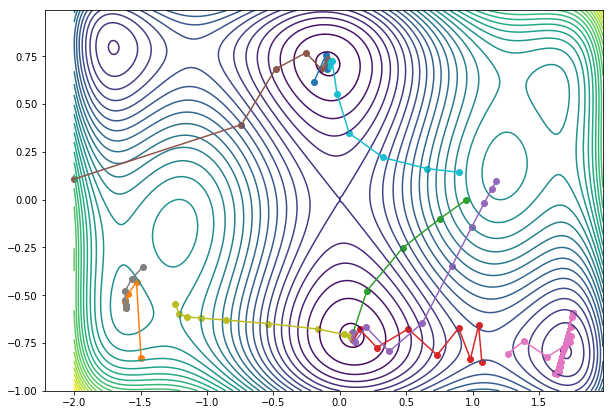

In [12]:
plt.figure(figsize = (10,7))
plt.contour(X,Y,f_ex12(X,Y), 40)

for repetition in range(repetitions):
    x0 = np.r_[np.random.uniform(-2, 2) ,np.random.uniform(-1, 1)]
    grad_steps = grad_descent(x0, ak, max_iter, f_ex12, grad_f_ex12, threshold)
    plt.plot(grad_steps[:,0], grad_steps[:,1], linestyle = '-')
    plt.scatter(grad_steps[:,0], grad_steps[:,1])
    
plt.show()

We are plotting the contour plot and the gradient descent steps for 10 different traces with randomly generated starting points. We observe that the algorithm, in general, moves to the minimum of the valley of the starting point. One also observes that the algorithm 'jumps' into other valleys. This happens when the gradient and the step size re too large. Another interesting observation is that the algorithm can not converge whenever it ends up in one of the valleys at the very bottom right or very upper left. Due to the constant step size the algorithm never reaches the minimum, similar as in the previous exercise.

### The backtracking algorithm

In [17]:
X = np.arange(-2, 2, 0.02)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y, indexing = 'xy')

max_iter = 100
tol_fct = 1e-3
tol_a = 1e-3

repetitions = 5

The algorithm has converged at [ 1.70523862 -0.78855151] after 5 iterations!
The algorithm has converged at [-0.09181005  0.71017802] after 5 iterations!
The algorithm has converged at [ 0.08449858 -0.70965469] after 3 iterations!
The algorithm has converged at [ 0.10004102 -0.73499765] after 4 iterations!
The algorithm has converged at [-0.08796526  0.70194753] after 10 iterations!


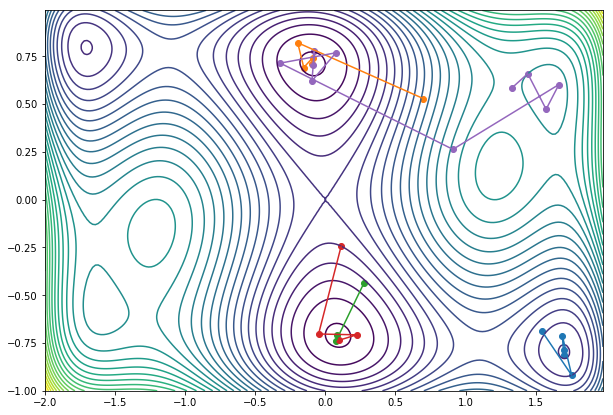

In [18]:
plt.figure(figsize = (10,7))
plt.contour(X,Y,f_ex12(X,Y), 40)

for repetition in range(repetitions):
    x0 = np.r_[np.random.uniform(-2, 2) ,np.random.uniform(-1, 1)]
    grad_steps = grad_backtracking(x0, max_iter, f_ex12, grad_f_ex12, tol_fct, tol_a)
    plt.plot(grad_steps[:,0], grad_steps[:,1], linestyle = '-')
    plt.scatter(grad_steps[:,0], grad_steps[:,1])
    
plt.show()

As can be seen from the output message of the backtracking algorithm, the number of iterations needed to find the minimum with a precision of 

$$
|f(x^{k+1}) - f(x^k)| < 10^{-3}
$$

is usually below 10. It always converges in contrast to the algorithm with constant step size. We also see that some of the steps are quite large, which leads to a jump between valleys. However, this happens only if the next step decreases the function value. In this way it is guaranteed to approach a minimum.


## The Rosenbrock function

The Rosenbrock function has the following form

$$
f(x_1, x_2) = (a - x_1)^2 + b(x_2 - x_1^2)^2.
$$

It has a global minimum at $(a,a^2)$, and the function value at these points is $f(x) = 0$. The global minimum is itself a long parabolic shaped valley.

### Contour plots for $a = 1$ and $b = 100$

In [19]:
X = np.arange(-4, 4, 0.05)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y, indexing = 'xy')

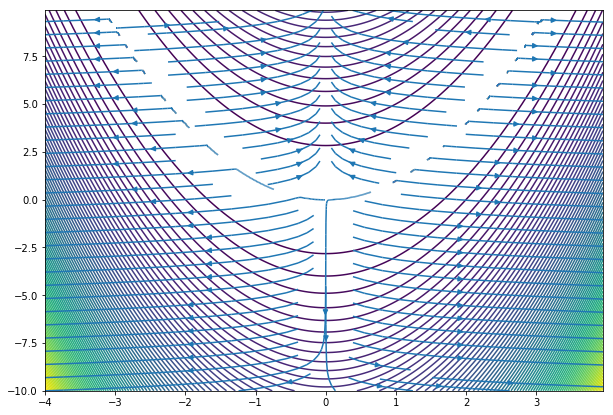

In [20]:
a = 1
b = 100

plt.figure(figsize = (10,7))
plt.contour(X,Y,f_ex13(X,Y), 100)
plt.streamplot(X, Y, grad_f_ex13(X,Y)[:X.shape[0],:], grad_f_ex13(X,Y)[Y.shape[0]:,:])
plt.show()

In this plot we observe the valley of the Rosenbrock function that has a global minimum at $(1,1)$.

### Gradient descent with different starting points

In [21]:
X = np.arange(-4, 4, 0.02)
Y = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(X, Y, indexing = 'xy')

ak = 0.1
tol_fct = 1e-10
tol_a = 1e-10
max_iter = 200000

repetitions = 4

The algorithm has converged at [1.00430186 1.00863073] after 17483 iterations!
The algorithm has converged at [1.00597648 1.0120245 ] after 1827 iterations!
The algorithm has converged at [0.98630379 0.97276917] after 2691 iterations!
The algorithm has converged at [0.99561927 0.99123106] after 3995 iterations!


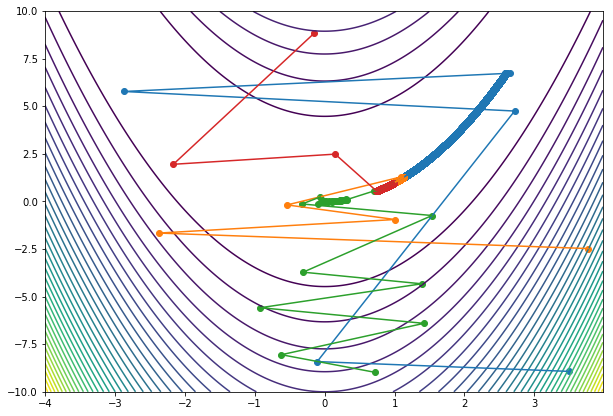

In [22]:
plt.figure(figsize = (10,7))
plt.contour(X,Y,f_ex13(X,Y),40)

for repetition in range(repetitions):
    x0 = np.r_[np.random.uniform(-4, 4) ,np.random.uniform(-10, 10)]
    grad_steps = grad_backtracking(x0, max_iter, f_ex13, grad_f_ex13, tol_fct, tol_a)
    plt.plot(grad_steps[:,0], grad_steps[:,1], linestyle = '-')
    plt.scatter(grad_steps[:,0], grad_steps[:,1])
    
plt.show()

For the Rosenbrock function the algorithm encounters quickly the valley of the minimum, but it takes many iterations until it reaches the actual minimum point at $(1,1)$. It also highly depends on the threshold values. For example, it only always reaches the minimum if the threshold for $\alpha$ as well as the function differences $|f(x^k) - f^{k+1}|$ are set at $10^{-10}$. This makes intuitive sense, since the valley is very flat so that the algorithm may very easily find a value that is within a threshold that is set at higher values.

Nevertheless, for this function the algorithm needs many iterations to converge, which is attributed to the nature of the gradient descent. The negative gradient points at the direction of steepest descent, which is not along the valey, so that the trajectory goes a 'zig-zag' way.

# Newton descent method

## A simple quadratic function

We will investigate the quadratic function

$$
f(x) = 100 x_1^2 + x_2^2
$$

using the Newton descent method.

### Standard backtracking gradient descent

In [23]:
X = np.arange(-20, 20, 0.1)
Y = np.arange(-40, 40, 0.1)
X, Y = np.meshgrid(X, Y, indexing = 'xy')

x0 = np.r_[np.random.uniform(-20, 20) ,np.random.uniform(-40, 40)]
max_iter = 10000
tol_fct = 1e-3
tol_a = 1e-3

grad_steps = grad_backtracking(x0, max_iter, f_ex21, grad_f_ex21, tol_fct, tol_a)

The algorithm has converged at [-0.01041325 -0.78857326] after 152 iterations!


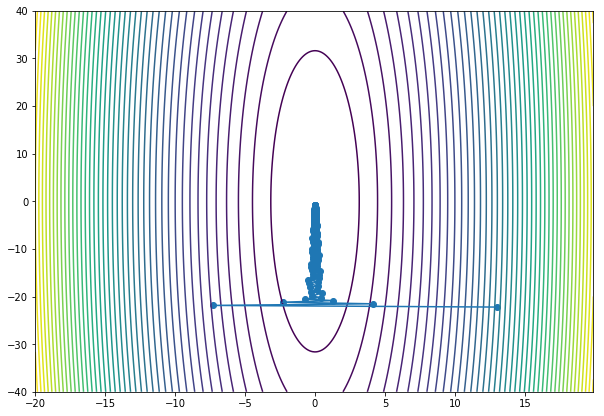

In [24]:
plot_grad_descent(X, Y, f_ex21(X,Y), grad_steps)

### Newton direction

In the Newton descent method

$$
x^{k+1} = x^k + \alpha^k d^k
$$

where the descent direction $d^k$ in

$$
\nabla^2 f(x^k) \cdot d^k = - \nabla f(x^k) 
$$ 

is obtained from the second order Taylor expansion of $f(x^k)$. 

In [25]:
grad_steps = grad_backtracking(x0, max_iter, f_ex21, desc_dir_ex21, tol_fct, tol_a)

The algorithm has converged at [0. 0.] after 2 iterations!


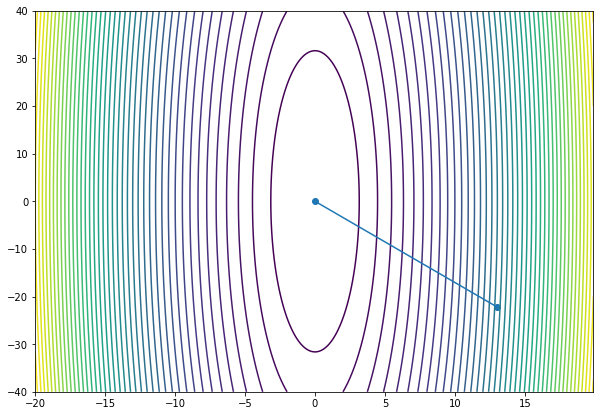

In [26]:
plot_grad_descent(X, Y, f_ex21(X,Y), grad_steps)

From the plot it is clear that the Newton direction is a wiser direction than the gradient descent direction. Using the same starting point, the Newton descent takes significantly less iterations to reach the minimum.

## The exercise of lab 1

In [27]:
X = np.arange(-2.5, 2.5, 0.02)
Y = np.arange(-1.25, 1.25, 0.01)
X, Y = np.meshgrid(X, Y, indexing = 'xy')

max_iter = 1000
tol_fct = 1e-6
tol_a = 1e-6

repetitions = 3


Gradient descent
The algorithm has converged at [-1.70367678  0.79583128] after 9 iterations!
Newton descent
The algorithm has converged at [-1.70360671  0.79608357] after 6 iterations!

Gradient descent
The algorithm has converged at [-0.08951644  0.71273128] after 5 iterations!
Newton descent
The algorithm has converged at [-0.08984201  0.7126564 ] after 6 iterations!

Gradient descent
The algorithm has converged at [ 1.70366502 -0.79587171] after 14 iterations!
Newton descent
The algorithm has converged at [ 1.70360672 -0.79608357] after 12 iterations!


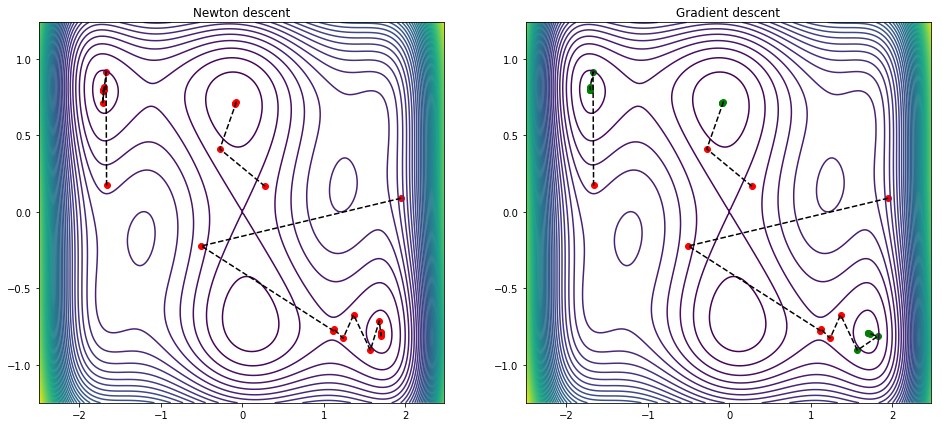

In [28]:
plt.figure(figsize = (16,7))
plt.subplot(121)
plt.contour(X,Y,f_ex22(X,Y), 60)
plt.title("Newton descent")
plt.subplot(122)
plt.contour(X,Y,f_ex22(X,Y), 60)
plt.title("Gradient descent")

for repetition in range(repetitions):
    x0 = np.r_[np.random.uniform(-2.5, 2.5) , np.random.uniform(-1.25, 1.25)]
    
    print("\nGradient descent")
    grad_steps_pure = grad_backtracking(x0, max_iter, f_ex22, grad_f_ex22, tol_fct, tol_a)
    
    print("Newton descent")
    grad_steps, newton = grad_backtracking(x0, max_iter, f_ex22, desc_dir_ex22, tol_fct, tol_a, hess_f_ex22)
    grad_steps_newton = grad_steps[newton]
    grad_steps_gradient = grad_steps[list(map(negate, newton))]
    
    plt.subplot(121)
    plt.plot(grad_steps_pure[:,0], grad_steps_pure[:,1], 'k--')
    plt.scatter(grad_steps_pure[:,0], grad_steps_pure[:,1], c = 'r')
    
    plt.subplot(122)
    plt.plot(grad_steps[:,0], grad_steps[:,1], 'k--')
    plt.scatter(grad_steps_newton[:,0], grad_steps_newton[:,1], c = 'green')
    plt.scatter(grad_steps_gradient[:,0], grad_steps_gradient[:,1], c = 'r')

plt.show()

In the left figure, we are plotting the standard backtracking gradient descent from the previous section. One sees
that the algorithm not chooses very widely the descent directions, especially when the step size is large.

In the right figure, we are plotting the combined Newton-gradient descent where the red dots represent standard gradient descent and the green dots Newton descent. The Newton descent direction is chosen when $d^k$ is a descent direction, which is the case when the Hessian is positive definite. Otherwise the gradient descent direction is chosen.

As mentioned in the lab exercise sheet we observe that the Newton descent is used close to the minima, when the Hessian is positive definite, while far away from the minima the algorithm decides for the standard gradient descent.

Overall, the number of iterations for this configuration is comparable, but the Newton method has slightly less iterations depending on the starting point. 

## The Rosenbrock function

In [29]:
X = np.arange(-4, 4, 0.02)
Y = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(X, Y, indexing = 'xy')

tol_fct = 1e-10
tol_a = 1e-10
max_iter = 150000

repetitions = 3


Gradient descent
The algorithm has converged at [1.00429519 1.00861731] after 1670 iterations!
Newton descent
The algorithm has converged at [1. 1.] after 20 iterations!

Gradient descent
The algorithm has converged at [1.00707494 1.01424227] after 4102 iterations!
Newton descent
The algorithm has converged at [1. 1.] after 22 iterations!

Gradient descent
The algorithm has converged at [1.00306658 1.00616102] after 6769 iterations!
Newton descent
The algorithm has converged at [1. 1.] after 27 iterations!


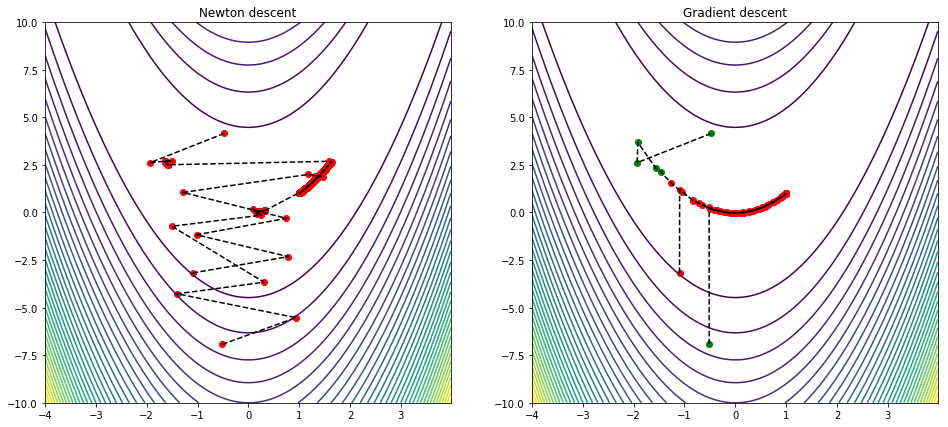

In [30]:
plt.figure(figsize = (16,7))
plt.subplot(121)
plt.contour(X,Y,f_ex13(X,Y), 40)
plt.title("Newton descent")
plt.subplot(122)
plt.contour(X,Y,f_ex13(X,Y), 40)
plt.title("Gradient descent")

for repetition in range(repetitions):
    x0 = np.r_[np.random.uniform(-4, 4) ,np.random.uniform(-10, 10)]
    
    print("\nGradient descent")
    grad_steps_pure = grad_backtracking(x0, max_iter, f_ex23, grad_f_ex23, tol_fct, tol_a)
    
    print("Newton descent")
    grad_steps, newton = grad_backtracking(x0, max_iter, f_ex23, desc_dir_ex23, tol_fct, tol_a, hess_f_ex22)
    grad_steps_newton = grad_steps[newton]
    grad_steps_gradient = grad_steps[list(map(negate, newton))]
    
    plt.subplot(121)
    plt.plot(grad_steps_pure[:,0], grad_steps_pure[:,1], 'k--')
    plt.scatter(grad_steps_pure[:,0], grad_steps_pure[:,1], c = 'r')

    plt.subplot(122)
    plt.plot(grad_steps[:,0], grad_steps[:,1], 'k--')
    plt.scatter(grad_steps_newton[:,0], grad_steps_newton[:,1], c = 'green')
    plt.scatter(grad_steps_gradient[:,0], grad_steps_gradient[:,1], c = 'r')
    
plt.show()

Also for the Rosenbrock function we are plotting the standard backtracking gradient descent in the left figure and the combined Newton-gradient descent in the right figure. For this function the number of iterations is vastly for the both approaches. The Newton direction manages to get into the valley at the lowest point without overshooting, so that when gradient descent sets in the gradient points along the valley and the algorithm doesn't move along a zig-zig direction. 